# Importing Module and define directories

In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import MLP
import layer
importlib.reload(MLP)
importlib.reload(layer)
from MLP import MLP
from utils.preprocessing import split, StandardScaler, MinMaxScaler

In [2]:

def plot_results(network):
    train_pred = network.predict(input_data)
    val_pred = network.predict(val_data)
    x = np.arange(len(network.train_MEE))

    fig = plt.figure(figsize=(13,4))

    fig.add_subplot(131)
    plt.plot(x,network.train_MEE)
    plt.plot(x,network.val_MEE,label="test")
    plt.title("Learning curve")
    plt.xlabel("Epochs")
    plt.ylabel("Squared error")
    plt.yscale("log")
    plt.legend()

    fig.add_subplot(132)
    plt.title('Residual for training data')
    plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
    plt.legend()

    fig.add_subplot(133)
    plt.title('Residual for validation data')
    plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
    plt.legend()
    plt.tight_layout()
    plt.show()
    netw.predict(input_data)


# Train - Validation Split

In [3]:
raw_data=np.loadtxt("../../data/Data_set.txt")
#raw_data=np.delete(raw_data,10,axis=1)
np.random.shuffle(raw_data)
#raw_normalizer=Normalize()
#raw_data=raw_normalizer.normalize(raw_data)

data = raw_data[:,:10] ; labels = raw_data[:,-2:]
normdata=StandardScaler()
normlabel=StandardScaler(kind="vector")
out0=np.reshape(labels[:,0],(len(labels),1))
out1=np.reshape(labels[:,1],(len(labels),1))
data=normdata.fit_transform(data)
labels=normlabel.fit_transform(labels)

In [4]:
#xavier weight inizialization
def xavier(structure):
    start=np.zeros(len(structure))
    for idx,num in enumerate(structure):
        if idx==0:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx])
        else:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx-1]+structure[idx])
    return list(start)


# Define the MLP

In [9]:
structure=[10,5,2]
print(structure)
act_func=[("tanh",1),("relu",1)]+[("linear",1)]

start=xavier(structure)

netw = MLP(structure, func=act_func,
           starting_points=start)

[10, 5, 2]


## Train the model

In [10]:
N_epoch = 10000 ; k = 1 ; min_index = 0 ; list_cand = [] ;Mse_cand = [] ; lamb= 1e-6
batch_size = -1#-1 for batch gradient descent 
alpha = 0.2 ; nesterov= True ; beta = 0.8 ; eta_function = 5e-4
tr_kfold = np.array([])
val_kfold = np.array([])
for i in range (0,k):
    #netw = MLP(structure, func=act_func,starting_points = start)
    TR_set, VL_set, TR_lab, VL_lab = split(data,labels,kind="hold_out")
    netw.train(TR_set,TR_lab , VL_set, VL_lab,
            epoch = N_epoch,
            batch_size=batch_size,
            eta = eta_function, lamb = lamb,alpha=alpha,
            nesterov=nesterov,RMSProp=True,beta=beta,error_threshold = 0, patience = 300)
    tr_kfold = np.append(tr_kfold,netw.train_MEE[-1])
    val_kfold = np.append(val_kfold,netw.val_MEE[-1])
    Mse_cand = np.append(Mse_cand,netw.train_MSE[-1])
    list_cand.append(netw)
min_index = np.argmin(val_kfold)
#print(tr_kfold, val_kfold) 
#calculate the mean on the k-fold
print('val error : ',np.mean(val_kfold) ,'+/-' ,np.std(val_kfold))
print('training error :',np.mean(tr_kfold),'+/-',np.std(tr_kfold))
print('the best result is :' ,val_kfold[min_index])
print('MSE mean :',(np.mean(Mse_cand)))

Epoch 1851:  [train MEE = 0.1572]  [val MEE = 0.1626]                              
Elapsed time: 4.979919672012329 s
val error :  0.16258290403678244 +/- 0.0
training error : 0.15723240705497307 +/- 0.0
the best result is : 0.16258290403678244
MSE mean : 0.0382543959380357


# Plot results

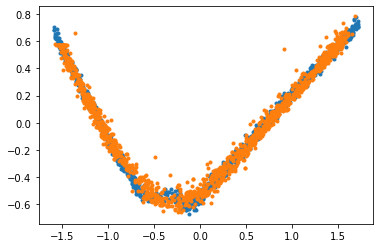

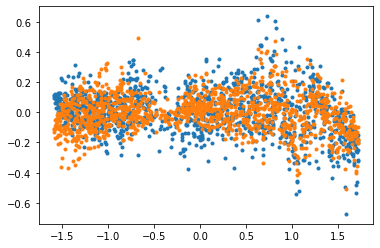

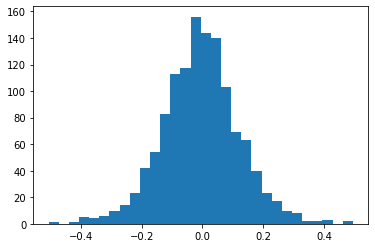

In [11]:
pred=netw.predict(data)
plt.plot(labels[:,1],labels[:,0],".")
plt.plot(pred[:,1],pred[:,0],".")
plt.figure()
plt.plot(np.sort(labels[:,1]),pred[:,1][np.argsort(labels[:,1])]-labels[:,1][np.argsort(labels[:,1])],".")
plt.plot(np.sort(labels[:,1]),pred[:,0][np.argsort(labels[:,1])]-labels[:,0][np.argsort(labels[:,1])],".")
plt.figure()
plt.hist(pred[:,0]-labels[:,0],30)
plt.show()

(array([117., 189., 174., 169., 167., 135., 108.,  90.,  78.,  57.,  36.,
         36.,  24.,  19.,  18.,  18.,  10.,   8.,   4.,   2.,   5.,   1.,
          1.,   4.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([0.01359381, 0.21955551, 0.4255172 , 0.6314789 , 0.8374406 ,
        1.04340229, 1.24936399, 1.45532568, 1.66128738, 1.86724907,
        2.07321077, 2.27917246, 2.48513416, 2.69109586, 2.89705755,
        3.10301925, 3.30898094, 3.51494264, 3.72090433, 3.92686603,
        4.13282772, 4.33878942, 4.54475112, 4.75071281, 4.95667451,
        5.1626362 , 5.3685979 , 5.57455959, 5.78052129, 5.98648298,
        6.19244468]),
 <BarContainer object of 30 artists>)

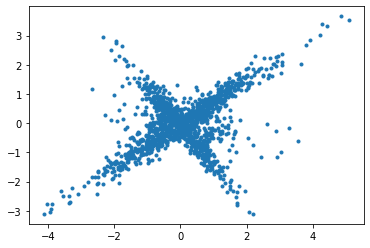

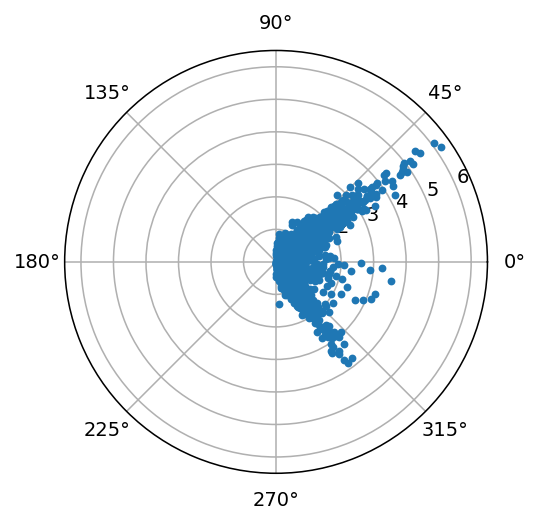

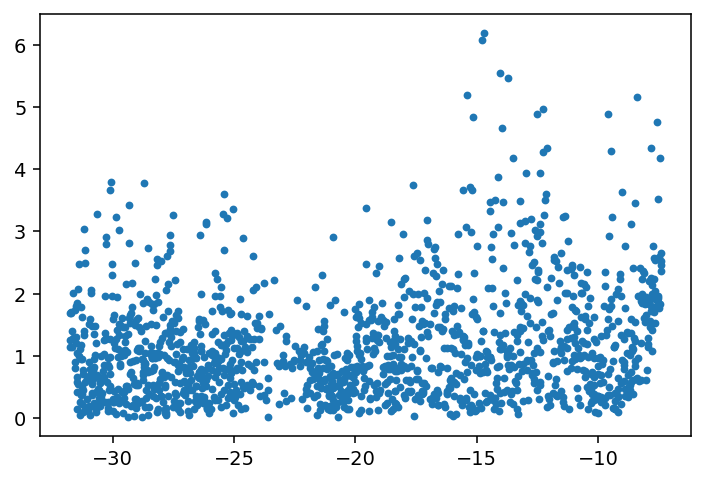

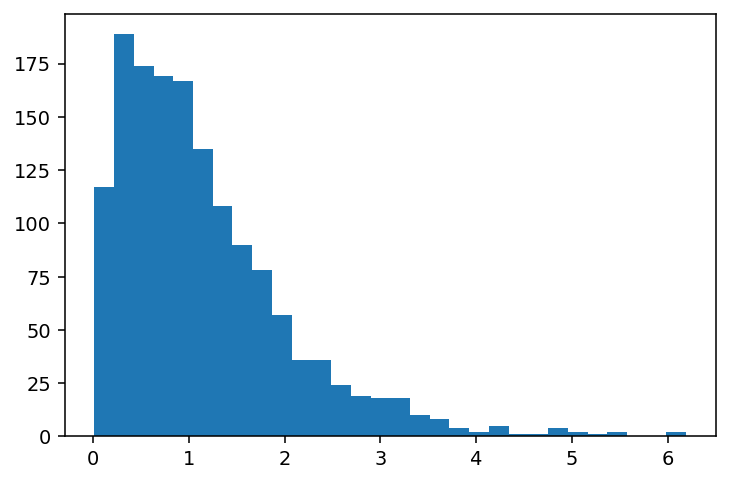

In [ ]:
plt.plot(pred[:,1]-labels[:,1],pred[:,0]-labels[:,0],".")
R=np.sqrt((pred[:,0]-labels[:,0])**2+(pred[:,1]-labels[:,1])**2)
theta=np.arctan((pred[:,0]-labels[:,0])/(pred[:,1]-labels[:,1]))
plt.figure(dpi=140)
plt.polar(theta,R,".")
plt.grid
plt.figure(dpi=140)
plt.plot(np.sort(labels[:,1]),R[np.argsort(labels[:,1])],".")
plt.figure(dpi=140)
plt.hist(R,30)

# Keras Try

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
inp=Input(shape=(10,))
hidden=Dense(5,activation='sigmoid')(inp)
hidden=Dense(5,activation='sigmoid')(inp)
output=Dense(2,activation='linear')(hidden)

model=Model(inputs=inp,outputs=output)
model.compile(optimizer='adam',loss='mse')
model.fit(data,labels,epochs=400,verbose=1)

Epoch 1/400
47/47 [==============================] - 0s 3ms/step - loss: 11.9190
Epoch 2/400
47/47 [==============================] - 0s 3ms/step - loss: 11.7571
Epoch 3/400
47/47 [==============================] - 0s 3ms/step - loss: 11.5962
Epoch 4/400
47/47 [==============================] - 0s 3ms/step - loss: 11.4363
Epoch 5/400
47/47 [==============================] - 0s 3ms/step - loss: 11.2765
Epoch 6/400
47/47 [==============================] - 0s 3ms/step - loss: 11.1166
Epoch 7/400
47/47 [==============================] - 0s 3ms/step - loss: 10.9569
Epoch 8/400
47/47 [==============================] - 0s 3ms/step - loss: 10.7969
Epoch 9/400
47/47 [==============================] - 0s 3ms/step - loss: 10.6383
Epoch 10/400
47/47 [==============================] - 0s 3ms/step - loss: 10.4816
Epoch 11/400
47/47 [==============================] - 0s 3ms/step - loss: 10.3261
Epoch 12/400
47/47 [==============================] - 0s 3ms/step - loss: 10.1720
Epoch 13/400
47/47 [=====

In [ ]:
model.fit(data,labels,epochs=200,verbose=1)

Epoch 1/200
47/47 [==============================] - 0s 4ms/step - loss: 0.8518
Epoch 2/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8520
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8512
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8508
Epoch 5/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8509
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8511
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8503
Epoch 8/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8505
Epoch 9/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8502
Epoch 10/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8499
Epoch 11/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8507
Epoch 12/200
47/47 [==============================] - 0s 3ms/step - loss: 0.8496
Epoch 13/200
47/47 [=================

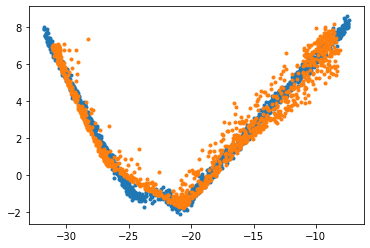

In [ ]:
pred=model.predict(VL_set)
tr=model.predict(TR_set)

plt.plot(labels[:,1],labels[:,0],".")
plt.plot(tr[:,1],tr[:,0],".")
#plt.plot(pred[:,1],pred[:,0],".")

In [ ]:
structure=[5,5,1]
new_data=np.column_stack((data,out0))
second = MLP(structure, func=act_func,starting_points = start)
TR_set, VL_set, TR_lab, VL_lab = split(new_data,out1,kind="hold_out")
eta_function = 1e-3
second.train(TR_set,TR_lab , VL_set, VL_lab,
        epoch = N_epoch,
        batch_size=batch_size,
        eta = eta_function, eta_params = eta_params, lamb = lamb,alpha=alpha,
        nesterov=nesterov,RMSProp=True,beta=beta,error_threshold = 0, patience = 200)

Epoch 1453:  [train MEE = 0.2619]  [val MEE = 0.2732]                              
Elapsed time: 13.44539999961853 s


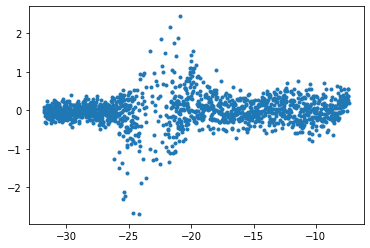

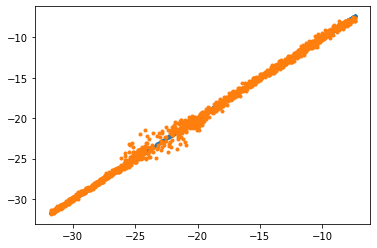

In [ ]:
prediction=np.reshape(second.predict(new_data),(len(new_data),1))
residue=out1-prediction
plt.plot(np.sort(np.ndarray.flatten(out1)),residue[np.argsort(np.ndarray.flatten(out1))],".")
plt.figure()
plt.plot(np.sort(out1),np.sort(out1),".")
plt.plot(out1,prediction,".")

In [ ]:
structure=[5,15,1]
first = MLP(structure, func=act_func,starting_points = start)
TR_set, VL_set, TR_lab, VL_lab = split(data,out0,kind="hold_out")
eta_function = 1e-3
first.train(TR_set,TR_lab , VL_set, VL_lab,
        epoch = N_epoch,
        batch_size=batch_size,
        eta = eta_function, eta_params = eta_params, lamb = lamb,alpha=alpha,
        nesterov=nesterov,RMSProp=True,beta=beta,error_threshold = 0, patience = 200)

Epoch 865:  [train MEE = 0.7596]  [val MEE = 0.7753]                              
Elapsed time: 23.076658248901367 s


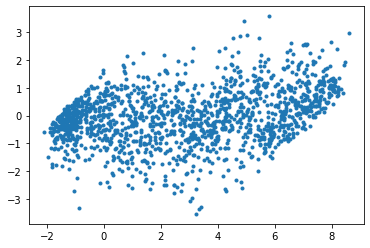

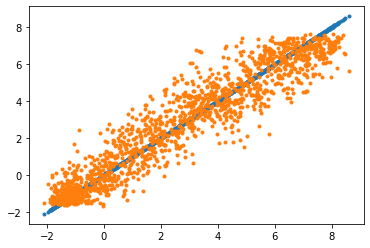

In [ ]:
prediction=np.reshape(first.predict(data),(len(data),1))
pred_out0=prediction
residue=out0-prediction
plt.plot(np.sort(np.ndarray.flatten(out0)),residue[np.argsort(np.ndarray.flatten(out0))],".")
plt.figure()
plt.plot(np.sort(out0),np.sort(out0),".")
plt.plot(out0,prediction,".")


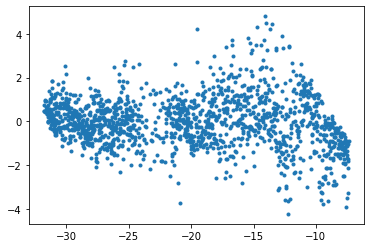

In [ ]:
final=np.column_stack((data,pred_out0))
res=second.predict(final)-out1
plt.plot(np.sort(np.ndarray.flatten(out1)),res[np.argsort(np.ndarray.flatten(out1))],".")